## Project 07 - AllLife Bank Credit Card Analysis
Y. P. Allen

## Business Overview
### Background
AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalized campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customer queries are resolved faster. 

#### Problem
1. How can AllLife Bank run personalized campaigns to target new Customers as well as upsell to existing Customers?
2. How does the Bank upgrade the service delivery model to ensure Customer queries are resolved faster?

#### Solution
Build Customer Segmentation model that will help AllLife Bank:
1. Target new Customers and upsell exisiting Customers.
2. Improve its services so that Customers resolutions are done quickly.

### Objective:
- Explore and visualize the dataset.
- Use clustering algorithms to identify different segments in the existing customer, based on their spending patterns as well as past interaction with the bank.
- Provide insights and recommendations to the bank on how to better market to Customers and improve service for customers.

### Data Description:
The data provided is of various customers of a bank and their financial attributes like credit limit, the total number of credit cards the customer has, and different channels through which customers have contacted the bank for any queries (including visiting the bank, online and through a call center).

*Data Dictionary:*
- Sl_No: Primary key of the records
- Customer Key: Customer identification number
- Average Credit Limit: Average credit limit of each customer for all credit cards
- Total credit cards: Total number of credit cards possessed by the customer
- Total visits bank: Total number of Visits that customer made (yearly) personally to the bank
- Total visits online: Total number of visits or online logins made by the customer (yearly)
- Total calls made: Total number of calls made by the customer to the bank or its customer service department (yearly)

In [1]:
## Import necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')  # Ignore warnings

#%load_ext nb_black  # This helps make the nb code more structured

# Remove the limit from the number of displayed columns and rows.
pd.set_option("display.max_columns", None)
# pd.set_option('display.max_rows', None)
pd.set_option("display.max_rows", 200)

# scale the data using z-score
from sklearn.preprocessing import StandardScaler

# Compute distances
from scipy.spatial.distance import cdist, pdist

# Perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to perform PCA
from sklearn.decomposition import PCA

### Read in Data and Initial Analysis

In [2]:
# Read in the Sheet1 of the Credit Card Customer Data Excel file

CC_Customer = pd.read_excel('Credit Card Customer Data.xlsx', sheet_name='Sheet1')

In [3]:
# Make a copy of the data for editing
data = CC_Customer.copy()

data.head()  # Check the headers of the data

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [4]:
data.shape   # Confirm the row and column count

(660, 7)

In [5]:
data.info()   # What are the data types and value counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [6]:
data.isna().sum()  # Confirm variables with missing values

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [7]:
# What is the percentage of missing values 
round(data.isnull().sum() / data.isnull().count() * 100, 2)

Sl_No                  0.0
Customer Key           0.0
Avg_Credit_Limit       0.0
Total_Credit_Cards     0.0
Total_visits_bank      0.0
Total_visits_online    0.0
Total_calls_made       0.0
dtype: float64

In [8]:
data.nunique()  # How many unique values are there for each variable?

Sl_No                  660
Customer Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

In [9]:
# Check for duplicate values 
data.duplicated().sum()

0

In [10]:
data.columns

Index(['Sl_No', 'Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made'],
      dtype='object')

**Observations:**
- There are 660 rows and 7 columns.
- There are no missing values.
- All columns are int64 values.
- There are no duplicates.

In [11]:
data.describe().T  # What is the five number summary?

,count,mean,std,min,25%,50%,75%,max
Sl_No,660.0,330.500000,190.669872,1.0,165.75,330.5,495.25,660.0
Customer Key,660.0,55141.443939,25627.772200,11265.0,33825.25,53874.5,77202.50,99843.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.00,18000.0,48000.00,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.00,5.0,6.00,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.00,2.0,4.00,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.00,2.0,4.00,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.00,3.0,5.00,10.0


**Observations:**
- Sl_No is a unique, integer number that can be dropped since it does not add any value to modeling.
- Customer Key ranges from 11265 to 99843; with a mean of 55141 and meadian of 53874. This is an integer value.
- Avg_Credit_Limit ranges from 3000 to 200,000; with a mean of 34574 and median of 18,000. This is an integer value. The currency is not provided.
- Total_Credit_Cards ranges from 1 to 10; with a mean of 4.7 and median of 5. This is an integer value.
- Total_visits_bank ranges from 0 to 5; with a mean of 2.4 and median of 2. This is an integer value.
- Total_visits_online ranges from 0 to 15; with a mean of 2.6 and median of 2. This is an integer value.
- Total_calls_made ranges from 0 to 10; with a mean of 3.5 and median of 3. This is an integer value.

In [12]:
# Drop Sl_No (Primary Key of the records) column from the dataframe
data.drop(columns=['Sl_No'], inplace=True)

## EDA
### Univariate Analysis

In [13]:
# Function to plot a boxplot and a histogram along the same scale.
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined
    data: dataframe, feature: dataframe column, figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False), bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid = 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # create the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="grey"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="mako"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

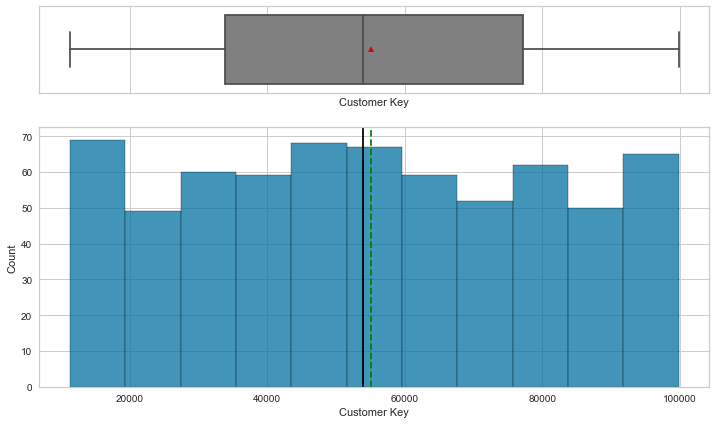

In [14]:
histogram_boxplot(data,'Customer Key')

**Observations:**
- The Customer Key has a nearly uniform distribution.
- This number can be dropped and will not contribute to modeling.

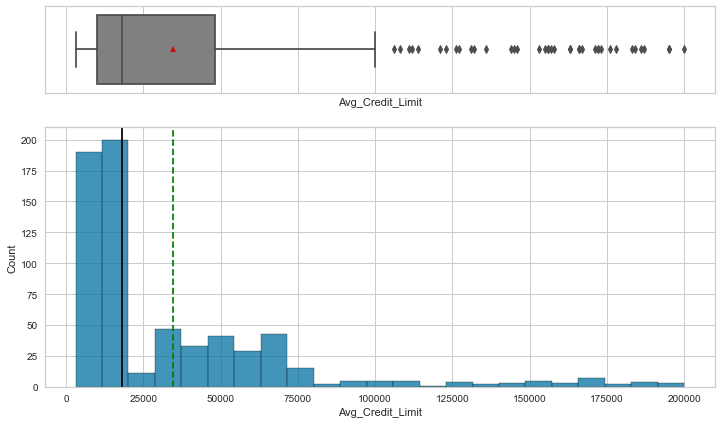

In [15]:
histogram_boxplot(data,'Avg_Credit_Limit')

In [16]:
## Let's look which Customers have the really high Credit Limits

data[data['Avg_Credit_Limit']>= 100000]

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,87073,100000,2,1,1,0
4,47437,100000,6,0,12,3
6,48370,100000,5,0,11,2
612,94391,157000,9,1,14,1
614,40019,163000,8,1,7,1
615,77910,131000,9,1,10,1
617,98216,136000,8,0,13,0
618,54495,121000,7,0,13,2
619,47650,158000,7,0,13,0
620,32107,108000,10,0,15,1


**Observations:**
- The Avg_Credit_Limit distribution has a right skew and many upper outliers that appear to represent real data.
- The Mean Avg_Credit_Limit is 34,574 and the Median Avg_Credit_Limit is 18.000.
- Most Customers have less than an 18,000 Credit Limit.
- For Customers with high Credit limits (>100.000), they tend to have a high number of Credit Cards and more Online visits and fewer in person Bank visits and total calls to the Bank.

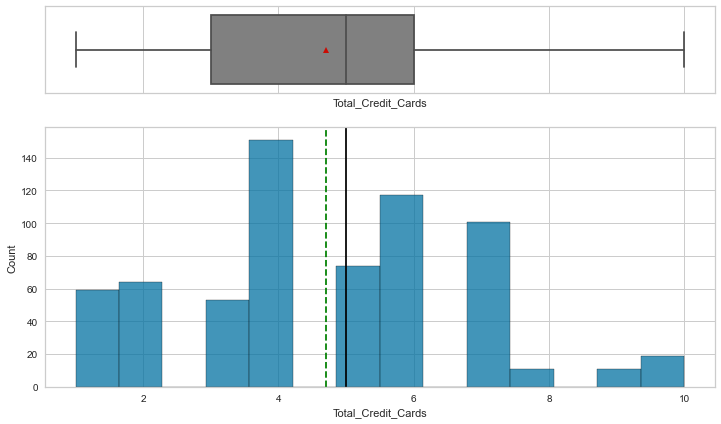

In [17]:
histogram_boxplot(data,'Total_Credit_Cards')

**Observations:**
- Total_Credit_Cards has a left skew distribution and has no outliers.
- The Mean for Total number of Credit Cards is 4.7 and the Median is 5.0.
- Most Customers own between 4 to 7 Credit Cards.

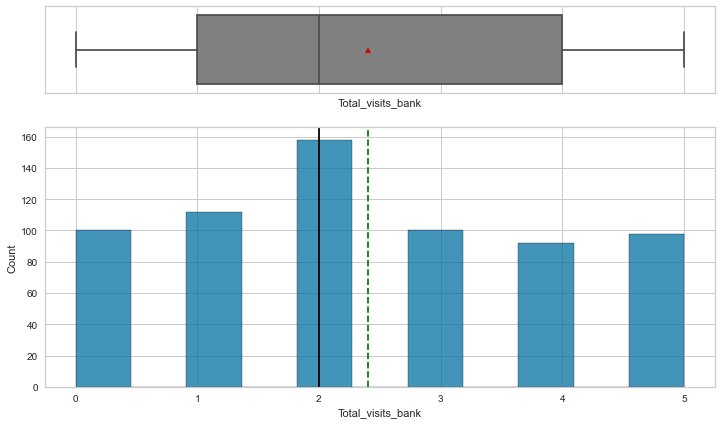

In [18]:
histogram_boxplot(data,'Total_visits_bank')

**Observations:**
- The Total_visits_bank distribution is slightly right skewed and has no outliers.
- The distribution peak is at a Count of 2/year.
- The Mean Count is 2.4/year and the Median Count is 2.0/year.

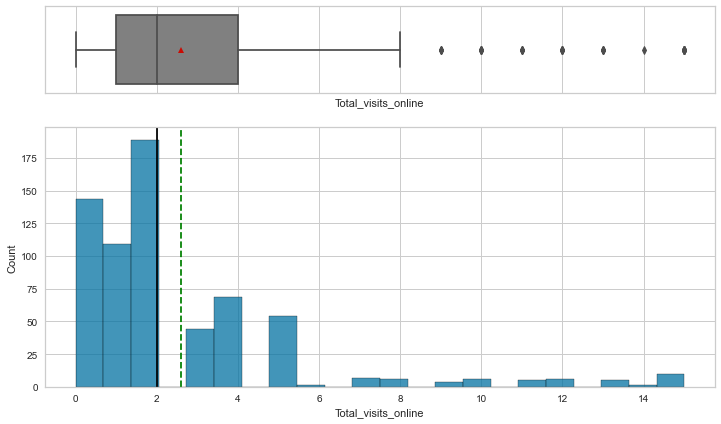

In [19]:
histogram_boxplot(data,'Total_visits_online')

**Observations:**
- The Total_visits_online is right skewed and has several upper outliers.
- These outliers appear to represent real Customer data and will not be treated.
- The count Mean is 2.6/year and the Median is 2/year.
- Most Customers make 5 or less total online visits per year.

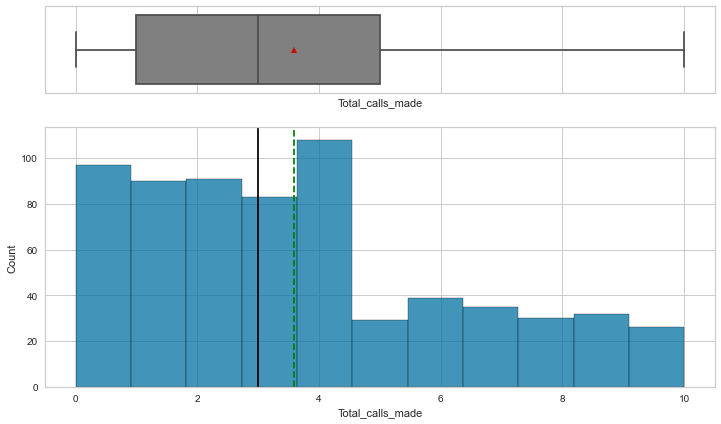

In [20]:
histogram_boxplot(data,'Total_calls_made')

**Observations:**
- The Total_calls_made is right skewed and has no outliers.
- Most customers have 4 or less calls per year.
- The Count Mean is 3.5/year and the Median is 3.0/year.

In [21]:
# Function to create labeled barplots

def barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top
    data: dataframe, feature: dataframe column, perc: whether to display percentages instead of
    count (default is False), n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

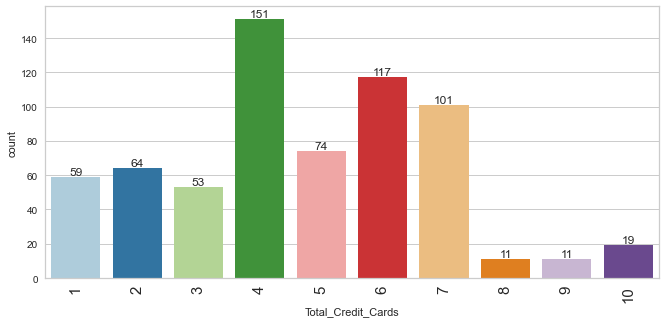

In [22]:
barplot(data,'Total_Credit_Cards')

**Observations:**
- Most Customers have 7 or fewer Credit Cards.

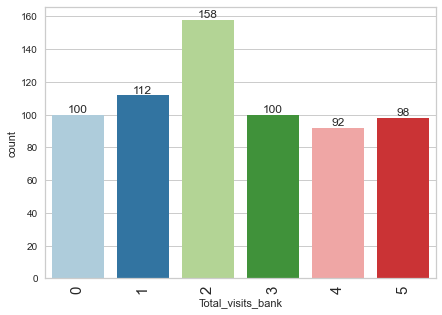

In [23]:
barplot(data,'Total_visits_bank')

- It is most common that Customers have just 2 visits with the Bank per year.
- The Customers from this sample are almost equally likely to have No Visits with the Bank or 1, 3, 4 or 5 Visits with the Bank per year. 

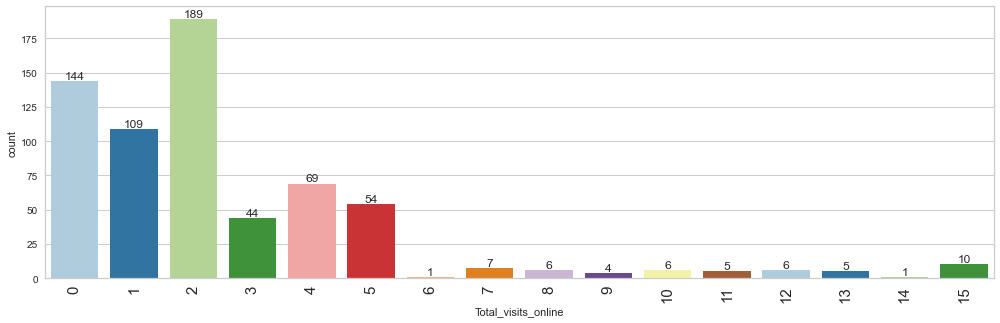

In [24]:
barplot(data,'Total_visits_online')

- It is most common that Customers have just 2 Online visits per year.
- Most Custpmers have 5 or less Online visits per year.

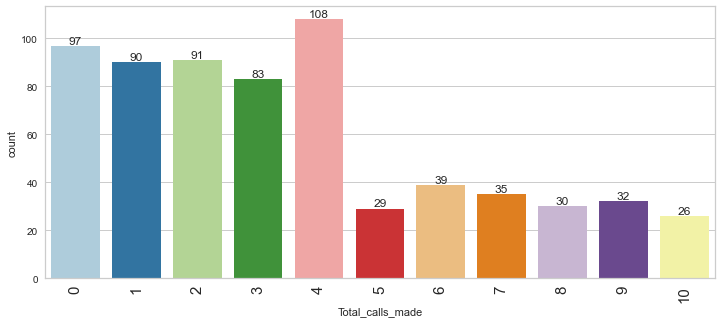

In [25]:
barplot(data,'Total_calls_made')

- It is most common that Customers have just 4 calls with the Bank per year.
- Most Customers have 4 or less calls with the Bank per year.

### Bi-variate Analysis

In [26]:
# Drop Customer Key column from the dataframe
data.drop(columns=['Customer Key'], inplace=True)

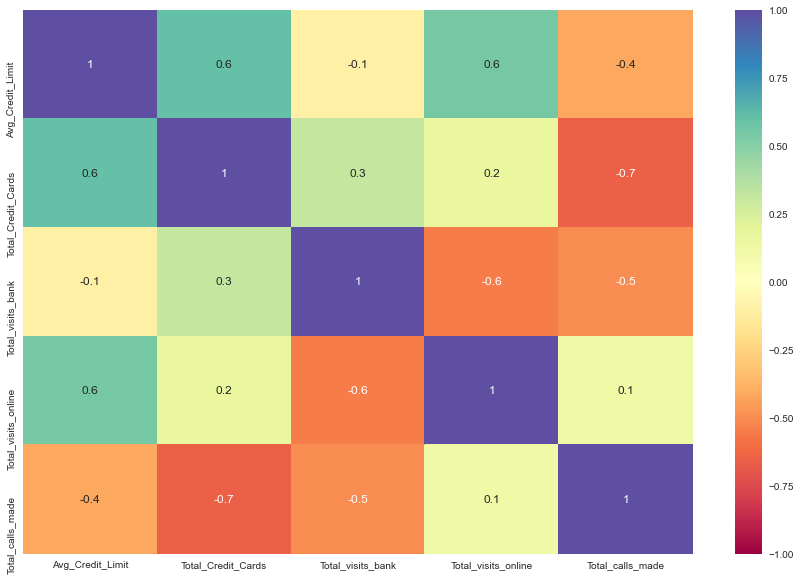

In [27]:
# Correlation Matrix
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True,vmin=-1,vmax=1,fmt='.1g',cmap="Spectral")
plt.show()

**Observations:**
- There is a negative correlation between Total_Credit_Cards and Total_calls_made (-0.7).
- There is a moderate, positive correlation between:
    - Avg_Credit_Limit and Total_Credit_Cards (0.6) - this is expected since the Total Credit limit increases with the number of Credit Cards owned.
    - Avg_Credit_Limit and Total_visits_online (0.6).
- There is a moderate, negative correlation between:
    - Total_visits_online and Total_visits_bank (-0.6) - this is not surprising since Customers may decide to either Bank in Person or Online.
    - Total_calls_made and Total_visits_bank (-0.5) - this is not surprising since Customers may decide to either visit the bank in person or make a phone call to the bank.
- There is no correlation between the other variables. 
- There are no variables with correlations greater than 0.7 magnitude, so it is not necessary to drop any of the variables.

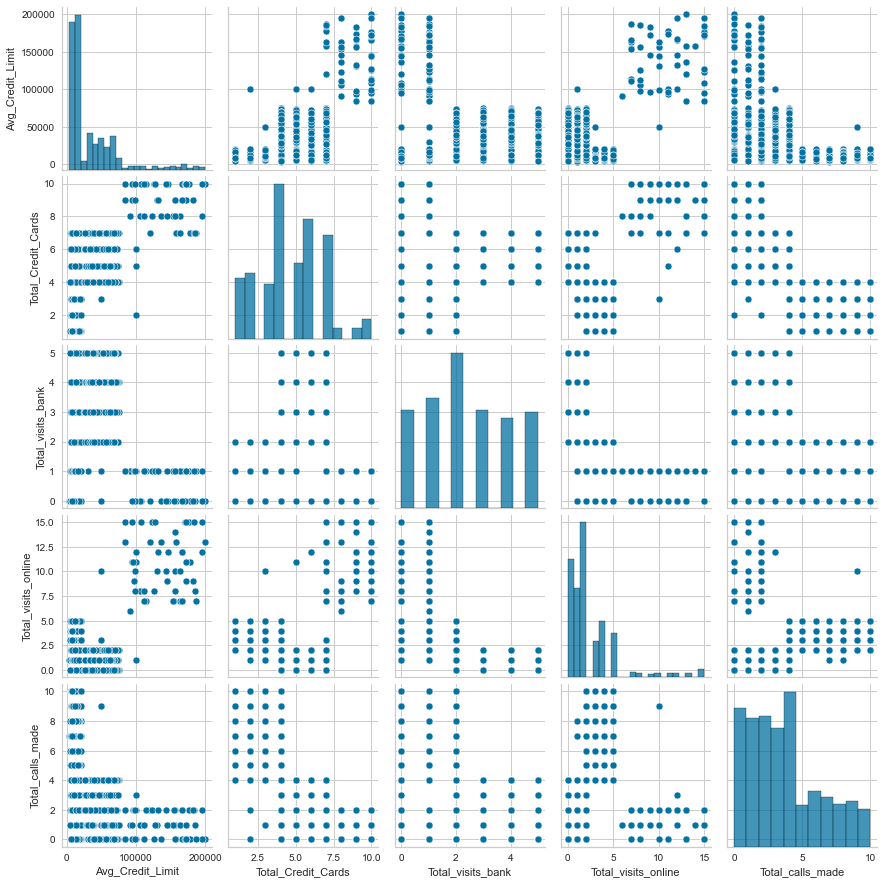

In [28]:
# Pair plots
sns.pairplot(data)
plt.show()

**Observations:**
- As mentioned above there is 
    - a high correlation between Total_Credit_Cards and Total_calls_made.
    - a moderate correlation between:
        - Avg_Credit_Limit and Total_Credit_Cards
        - Avg_Credit_Limit and Total_visits_online
        - Total_visits_online and Total_visits_bank
        - Total_visits_bank and Total_calls_made
- There is no Correlation between the other variables.

<AxesSubplot:xlabel='Total_Credit_Cards', ylabel='Avg_Credit_Limit'>

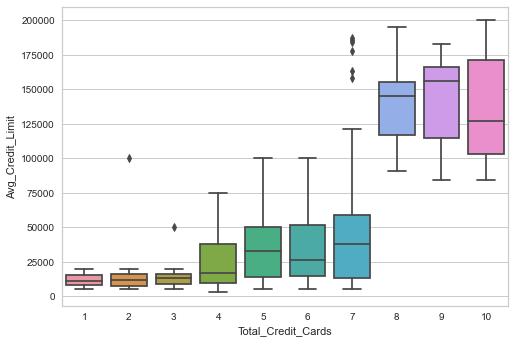

In [29]:
# Boxplot to display relationship between Number of Credit Cards and Average Credit Limit
sns.boxplot(y="Avg_Credit_Limit", x="Total_Credit_Cards", data=data, orient="vertical")

As expected, Customers who own more Credit Cards have higher Average Credit Limits.

<AxesSubplot:xlabel='Total_visits_online', ylabel='Avg_Credit_Limit'>

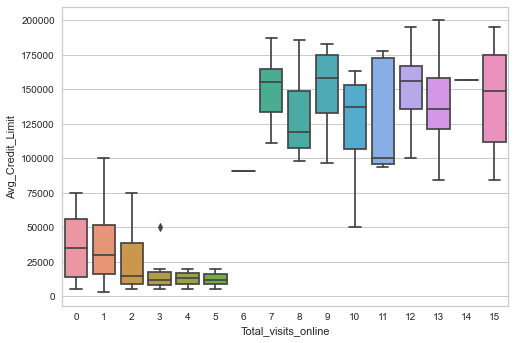

In [30]:
# Boxplot to display relationship between Number of Online visits and Average Credit Limit
sns.boxplot(y="Avg_Credit_Limit", x="Total_visits_online", data=data, orient="vertical")

- Customers with higher Online visits (>6) have higher Average Credit Limits.
- Customers with lower Online visits (<6) have the lowest Average Credit Limits.

<AxesSubplot:xlabel='Total_calls_made', ylabel='Avg_Credit_Limit'>

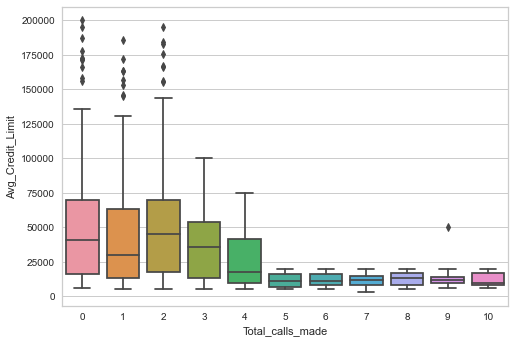

In [31]:
# Boxplot to display relationship between Number of Online visits and Average Credit Limit
sns.boxplot(y="Avg_Credit_Limit", x="Total_calls_made", data=data, orient="vertical")

- The Average Credit Limit decreases with the increase in the number of Total calls made per year.

<AxesSubplot:xlabel='Total_visits_online', ylabel='Total_visits_bank'>

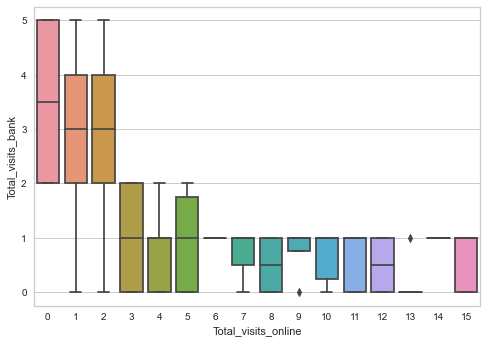

In [32]:
# Boxplot to display relationship between Number of Online visits and Number of Bank visits
sns.boxplot(y="Total_visits_bank", x="Total_visits_online", data=data, orient="vertical")

As the number of online visits increase, the number of bank visits decrease.

<AxesSubplot:xlabel='Total_calls_made', ylabel='Total_visits_bank'>

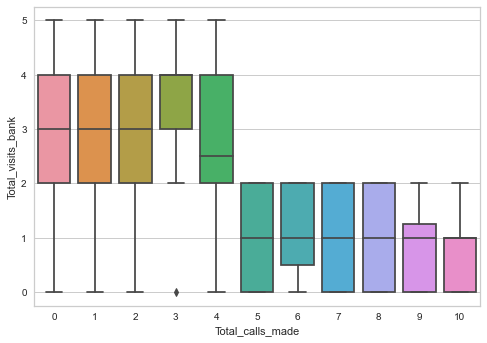

In [33]:
# Boxplot to display relationship between Number of calls made per year and Number of Bank visits per year
sns.boxplot(y="Total_visits_bank", x="Total_calls_made", data=data, orient="vertical")

- Customers who make 4 or less calls per week have higher numbers of total visits to the bank.
- Customers who make 5 or more calls per week have lower numbers of total visits to the bank.

<AxesSubplot:xlabel='Total_calls_made', ylabel='Total_visits_online'>

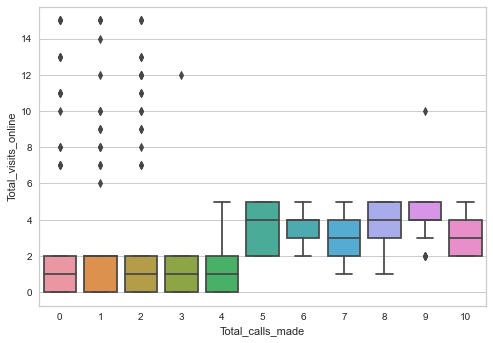

In [34]:
# Boxplot to display relationship between Number of calls made per year and Number of online visits per year
sns.boxplot(y="Total_visits_online", x="Total_calls_made", data=data, orient="vertical")

- Customers who make 4 or less calls per week have lower numbers of total online bank visits. However there are many outliers for this group who have a very high number of online visits.
- Customers who make 5 or more calls per week have higher numbers of total online bank visits.

### Insights from EDA
- EDA suggests there is an inverse relationship between the Total number of Credit Cards owned and the Total calls made to the bank. It is not clear why this is so.
    - Most Customers own between 4 to 7 Credit Cards.
- EDA shows that the Average Credit limit increases with the number of Credit Cards owned.
    - Most Customers have less than an 18,000 Credit Limit.
    - Customers with high Credit limits (>100.000) tend to have a high number of Credit Cards.
- EDA shows that the Average Credit limit also increases with the Total number of online visits. It is not clear why this is so.
    - Customers with high Credit limits (>100.000) tend to have more Online visits.
- EDA suggests Customers may decide to either Bank in Person vs Online.
- EDA suggests Customers may decide to either visit the bank in person vs make a phone call to the bank.
    - Most Customers make 5 or less total online visits per year.
    - Most customers have 4 or less Bank calls per year.
- EDA suggests that as Customers are more likely to visit the bank online they also make phone calls to the bank.
    - There are many outliers for the group that have a lower number of calls who also make a high number of online bank visits.
- There are no variables with correlations greater than 0.7 magnitude, so it is not necessary to drop any of the variables.    

## Data Prep
### Scale Data
First let's scale the data.

In [35]:
# Copy the data to another dataframe to avoid any changes to original data
df = data.copy()

# Select numerical columns
num_col = df.select_dtypes(include=np.number).columns.tolist()

In [36]:
# Scale the data set before clustering
scaler = StandardScaler()  # instantiate the Standard Scaler
subset = df[num_col].copy()  # create subset of just numerical data
subset_scaled = scaler.fit_transform(subset)  # apply the standard scaler

In [37]:
# Create a dataframe from the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

## K-Means Clustering
### Chosing K
What value of K should we choose?
First let's try elbow method.

Number of Clusters: 1 	Average Distortion: 2.0069222262503614
Number of Clusters: 2 	Average Distortion: 1.4571553548514269
Number of Clusters: 3 	Average Distortion: 1.1466276549150365
Number of Clusters: 4 	Average Distortion: 1.0463825294774465
Number of Clusters: 5 	Average Distortion: 0.9908683849620168
Number of Clusters: 6 	Average Distortion: 0.9430843103448057
Number of Clusters: 7 	Average Distortion: 0.9229503879335582
Number of Clusters: 8 	Average Distortion: 0.8841624977225856
Number of Clusters: 9 	Average Distortion: 0.866536903187489
Number of Clusters: 10 	Average Distortion: 0.8418675346197073


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

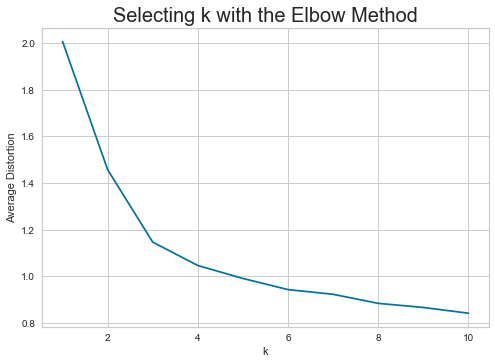

In [38]:
# Test a range of k values to find the right number of clusters for the scaled data
# using Euclidean distance
clusters = range(1, 11)  # test upto 10 clusters
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(subset_scaled_df)
    prediction = model.predict(subset_scaled_df)
    distortion = (
        sum(
            np.min(cdist(subset_scaled_df, model.cluster_centers_, "euclidean"), axis=1)
        )
        / subset_scaled_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)

A k value of 3, 4 or 5 may be appropriate based on this curve.

Next, let's check Silhouette Scores as a means to find the right k value.

For n_clusters = 2, silhouette score is 0.41842496663230405
For n_clusters = 3, silhouette score is 0.5157182558882754
For n_clusters = 4, silhouette score is 0.35566706193773706
For n_clusters = 5, silhouette score is 0.2717470361094591
For n_clusters = 6, silhouette score is 0.25546681708709906
For n_clusters = 7, silhouette score is 0.24497242740751862
For n_clusters = 8, silhouette score is 0.22765829431376705
For n_clusters = 9, silhouette score is 0.21905521125551344
For n_clusters = 10, silhouette score is 0.20628027647966818


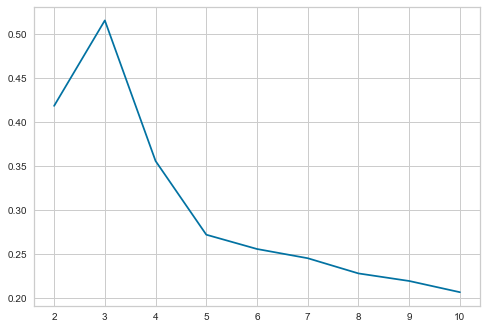

In [39]:
sil_score = []
cluster_list = list(range(2, 11))  # test upto 10 clusters
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_df))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score)

It appears that 3 is a good k value from this plot of silhouette scores.

Can we find the optimal k value with the silhouette coefficients?

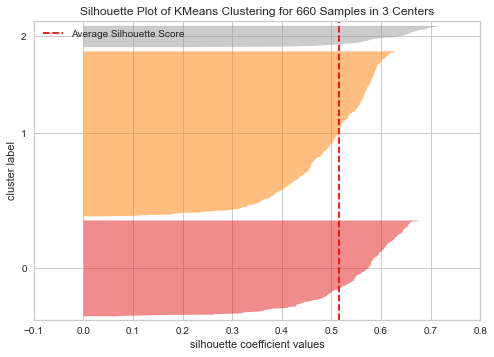

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [40]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

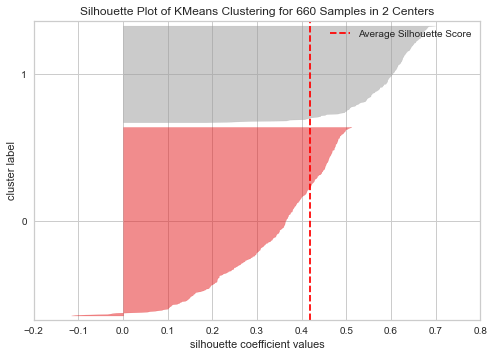

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [41]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(2, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

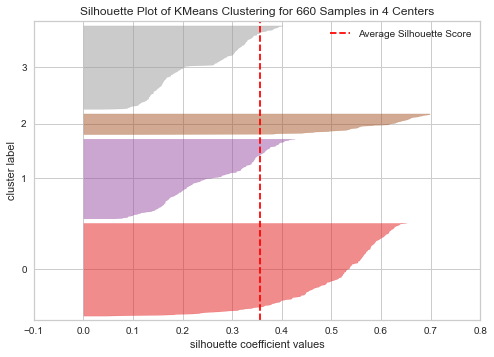

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [42]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

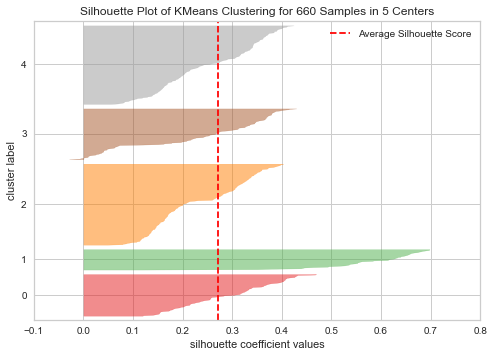

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [43]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

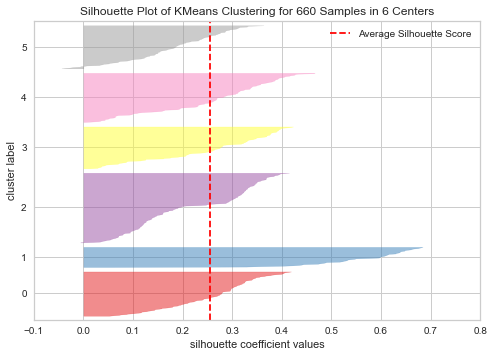

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [44]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(6, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

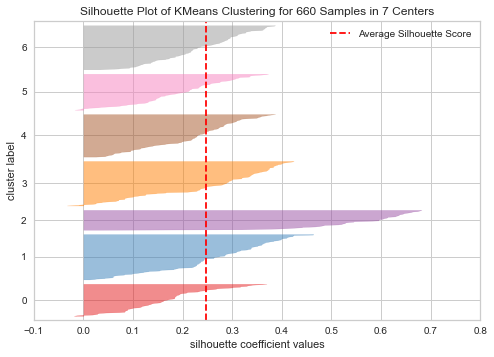

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 7 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [45]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(7, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

Let's use 3 as the k value since it has a high silhouette score and a bend in the elbow curve.
### K-means Clustering

In [46]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(subset_scaled_df)

KMeans(n_clusters=3, random_state=0)

In [47]:
# Add kmeans cluster labels to the original dataframe
df["K_means_segments"] = kmeans.labels_

In [48]:
# Create a df for visualization
subset_scaled_df_vis=subset_scaled_df
# Add kmeans cluster labels to the scaled dataframe
subset_scaled_df_vis["K_means_segments"] = kmeans.labels_

subset_scaled_df_vis.head(2)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K_means_segments
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537,0
1,0.410293,-0.787585,-1.473731,2.520519,1.891859,1


### Cluster Profile of K-means
- Are the Clusters meaningful?
- Do the Clusters have variability?

In [49]:
cluster_profile = df.groupby("K_means_segments").mean()

In [50]:
cluster_profile["count_in_each_segment"] = (
    df.groupby("K_means_segments")["Total_Credit_Cards"].count().values
)

In [51]:
# let's display cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0).highlight_min(color="lightblue", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segment
K_means_segments,,,,,,
0,33782.383420,5.515544,3.489637,0.981865,2.000000,386
1,12174.107143,2.410714,0.933036,3.553571,6.870536,224
2,141040.000000,8.740000,0.600000,10.900000,1.080000,50


There is variablity among the three clusters.

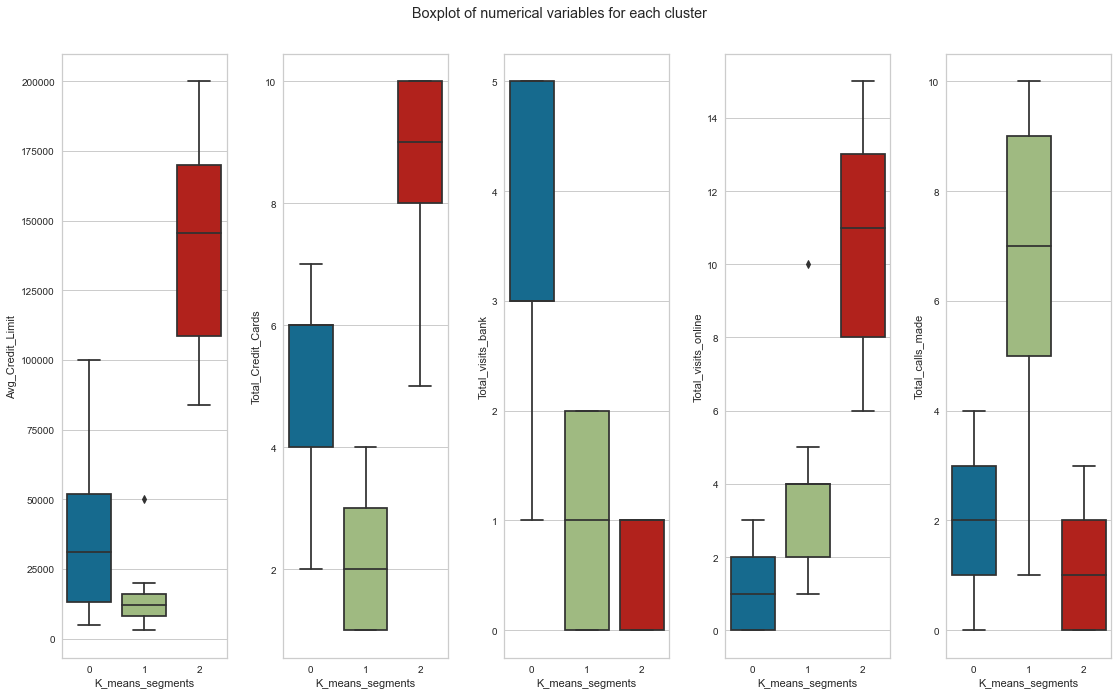

In [52]:
fig, axes = plt.subplots(1, 5, figsize=(16, 10))
fig.suptitle("Boxplot of numerical variables for each cluster")
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii], y=df[num_col[counter]], x=df["K_means_segments"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

<AxesSubplot:xlabel='K_means_segments'>

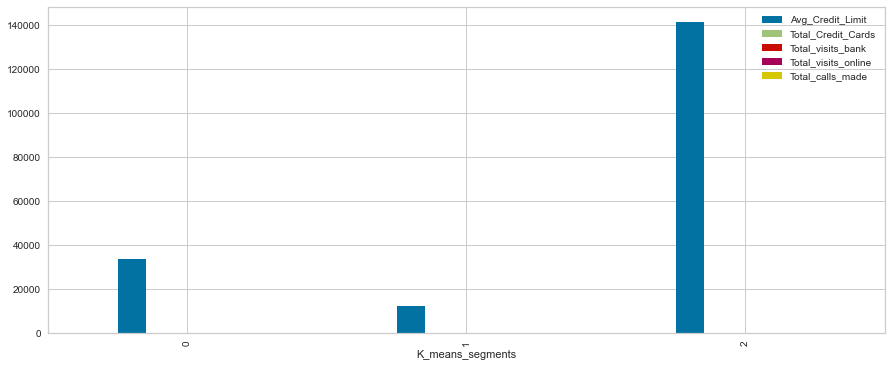

In [53]:
# Plot Kmeans segments for the Original Data
df.groupby("K_means_segments").mean().plot.bar(figsize=(15, 6))

The Avg_Credit_Limit and Customer Key dominate the unscaled data. Let's try ploting the scaled data.

<AxesSubplot:xlabel='K_means_segments'>

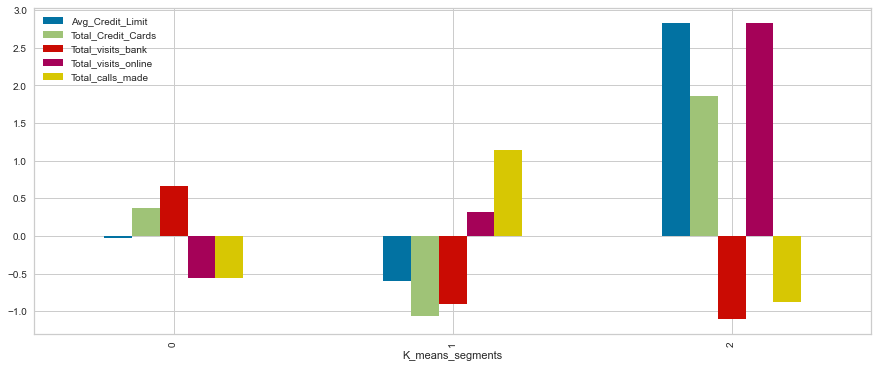

In [54]:
# Plot Kmeans segments for the Scaled Data
subset_scaled_df.groupby("K_means_segments").mean().plot.bar(figsize=(15, 6))

### Observations
- Cluster 0: Socializers
    - This group has a moderate Average Credit Limit ~20,000 to 50,000.
    - This group has a moderate number of Credit Cards - 4 to 6.
    - This group has the highest visits to the bank per year - 3 to 5.
    - This group has the lowest number of online bank visits per year - 0 to 2.
    - This group has a moderate number of bank calls per year - 1 to 3.

- Cluster 1: Callers
    - This group has the lowest Average Credit Limit <25,000.
    - This group has the least number of Credit Cards - 1 to 3.
    - This group has a low number of visits to the bank per year - 0 to 2.
    - This group has a moderate number of online bank visits per year - 2 to 4.
    - This group has the highest number of bank calls per year - 5 to 9.

- Cluster 2: Onliners
    - This group has the highest Average Credit Limit >75,000.
    - This group has the highest number of Credit Cards - 8 to 10.
    - This group has lowest number of visits to the bank per year - 0 to 1.
    - This group has the highest online bank visits per year - 8 to 13.
    - This group has the lowest number of bank calls per year - 0 to 2.
    
### Insights and Business Recommendations

- Cluster 0: Socializers
    - This group is most comfortable with face-to-face bank interactions.
    - This group should be marketed through visitation to Bank Branches. This group may be open to new lines of Credit. Incentives should include personalized Banking that may be most appealling to Cluster 0.

- Cluster 1: Callers
    - This group is least likely to own many Credit Cards and maintain a low Credit Limit. They are most comfortable with calling representatives for banking, and do not require face-to-face meetings.
    - This group should be marketed through phone calls. This group is the least likely to open new lines of Credit, so pitching new products could be the most challenging. Incentives should be maximized when targeting Cluster 1.

- Cluster 2: Onliners
    - This group is most likely to own a large number of Credit Cards and maintain a large Credit Limit. They are most comfortable with digital banking.
    - This group should be marketed through Online advertisements. This group is most likely to open new lines of Credit, so pitching new products could be the easiest with Cluster 2.

## Hierarchical Clustering

In [55]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.8788676940541079.
Cophenetic correlation for Euclidean distance and complete linkage is 0.8860521900934342.
Cophenetic correlation for Euclidean distance and average linkage is 0.9168725782090766.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.9133393931042242.
Cophenetic correlation for Chebyshev distance and single linkage is 0.8978014062578786.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.8623270916886306.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9160784250471772.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9109044268579872.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.895995252672423.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.6550023123197878.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.8467618899578889.
Cophenetic cor

In [56]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9168725782090766, which is obtained with Euclidean distance and average linkage.


Let's explore different linkage methods with Euclidean distance only since they have the highest cophenetic correlations.

In [57]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(subset_scaled_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.8788676940541079.
Cophenetic correlation for complete linkage is 0.8860521900934342.
Cophenetic correlation for average linkage is 0.9168725782090766.
Cophenetic correlation for centroid linkage is 0.9134704636213649.
Cophenetic correlation for ward linkage is 0.774233615737438.
Cophenetic correlation for weighted linkage is 0.9133393931042242.


In [58]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9168725782090766, which is obtained with average linkage.


The cophenetic correlation is maximum with Euclidean distance and average linkage.

Let's see the dendrograms for the different linkage methods.

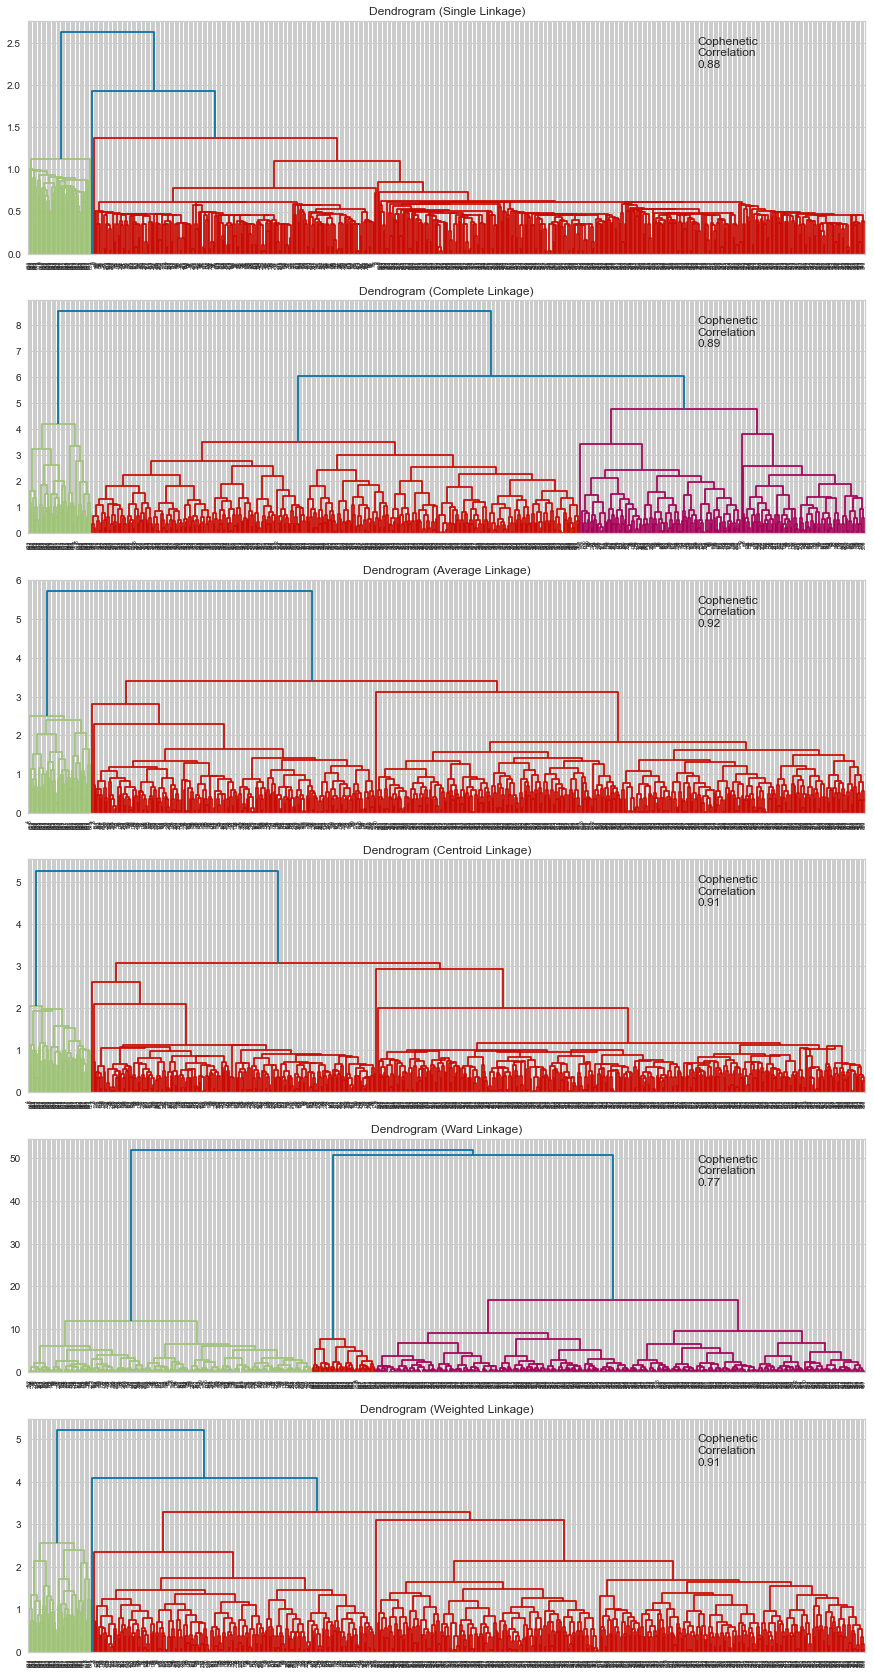

In [59]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(subset_scaled_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

**Observations**

- The cophenetic correlation is highest for average and centroid linkage methods.
- The Complete Linkage gives the best separation of Clusters. We will move ahead with Complete linkage.
- 5 appears to be the appropriate number of clusters from the dendrogram for Ward linkage.

In [60]:
# Create the hierarchical clusters using 5 clusters, Euclidean distance and Complete linkage
HCmodel = AgglomerativeClustering(n_clusters=5, affinity="euclidean", linkage="complete")
HCmodel.fit(subset_scaled_df)

AgglomerativeClustering(linkage='complete', n_clusters=5)

In [61]:
# Add the labels to the scaled data and the original data
subset_scaled_df["HC_Clusters"] = HCmodel.labels_
df["HC_Clusters"] = HCmodel.labels_

### Cluster Profiling - Hierarchical Clustering with 5 Clusters
- Are the Clusters meaningful?
- Do the Clusters have variability?

In [62]:
cluster_profile = df.groupby("HC_Clusters").mean()

In [63]:
cluster_profile["count_in_each_HCsegment"] = (
    df.groupby("HC_Clusters")["Total_Credit_Cards"].count().values
)

In [64]:
# let's see the Credit Cards in each cluster
for cl in df["HC_Clusters"].unique():
    print("In cluster {}, the Customers have the following number of credit cards:".format(cl))
    print(df[df["HC_Clusters"] == cl]["Total_Credit_Cards"].unique())
    print()

In cluster 0, the Customers have the following number of credit cards:
[2 3 4 1]

In cluster 1, the Customers have the following number of credit cards:
[3 4 1 2]

In cluster 2, the Customers have the following number of credit cards:
[7 5 4 6]

In cluster 3, the Customers have the following number of credit cards:
[ 6  5  9 10  8]

In cluster 4, the Customers have the following number of credit cards:
[ 9  8  7 10]



There is variability among the Clusters regarding the number of Credit Cards.

In [65]:
# let's see the Total Bank Visits in each cluster
for cl in df["HC_Clusters"].unique():
    print("In cluster {}, the Customers have the following number of Bank visits:".format(cl))
    print(df[df["HC_Clusters"] == cl]["Total_visits_bank"].unique())
    print()

In cluster 0, the Customers have the following number of Bank visits:
[1 0 2]

In cluster 1, the Customers have the following number of Bank visits:
[0 2 1]

In cluster 2, the Customers have the following number of Bank visits:
[1 2 5 3 4]

In cluster 3, the Customers have the following number of Bank visits:
[0 1]

In cluster 4, the Customers have the following number of Bank visits:
[1 0]



There is variability among the clusters regarding the number of Bank visits.

In [66]:
# let's see the Total Online Visits in each cluster
for cl in df["HC_Clusters"].unique():
    print("In cluster {}, the Customers have the following number of Online visits:".format(cl))
    print(df[df["HC_Clusters"] == cl]["Total_visits_online"].unique())
    print()

In cluster 0, the Customers have the following number of Online visits:
[1 2 5 4 3]

In cluster 1, the Customers have the following number of Online visits:
[10  1  2  5  3  4]

In cluster 2, the Customers have the following number of Online visits:
[3 1 0 2]

In cluster 3, the Customers have the following number of Online visits:
[12 11 15  6  8  7  9 10 13]

In cluster 4, the Customers have the following number of Online visits:
[14  7 10 13 12 15 11  8  9]



There is variability among the clusters regarding the number of Online visits.

In [67]:
# let's see the Total Calls Made in each cluster
for cl in df["HC_Clusters"].unique():
    print("In cluster {}, the Customers have the following number of Calls made:".format(cl))
    print(df[df["HC_Clusters"] == cl]["Total_calls_made"].unique())
    print()

In cluster 0, the Customers have the following number of Calls made:
[0 1 2 5 6 4 7]

In cluster 1, the Customers have the following number of Calls made:
[ 9  8  7 10  6]

In cluster 2, the Customers have the following number of Calls made:
[4 0 2 3 1]

In cluster 3, the Customers have the following number of Calls made:
[3 2 0 1]

In cluster 4, the Customers have the following number of Calls made:
[1 0 2]



There is variability among the clusters regarding the number of calls made.

In [68]:
# let's display cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0).highlight_min(color="lightblue", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K_means_segments,count_in_each_HCsegment
HC_Clusters,,,,,,,
0,12714.285714,2.500000,1.061224,3.387755,4.948980,0.989796,98
1,12448.818898,2.338583,0.834646,3.661417,8.299213,1.000000,127
2,33610.389610,5.524675,3.496104,0.981818,2.005195,0.000000,385
3,103421.052632,8.947368,0.684211,10.736842,1.210526,2.000000,19
4,164096.774194,8.612903,0.548387,11.000000,1.000000,2.000000,31


Highlighting minimums and maximums for each feature by Cluster displays variability among the clusters.

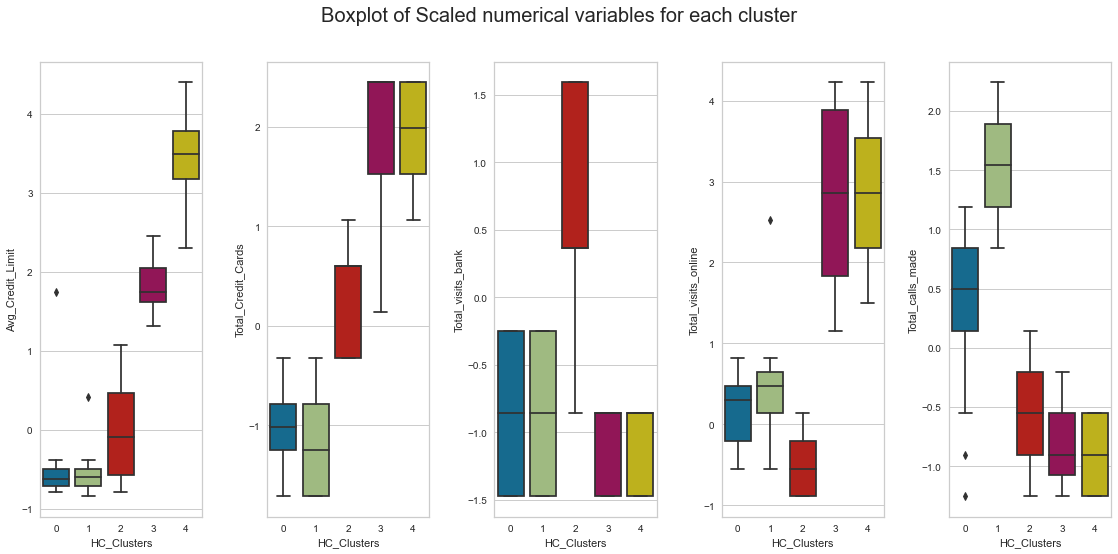

In [69]:
fig, axes = plt.subplots(1, 5, figsize=(16, 8))
fig.suptitle("Boxplot of Scaled numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii], y=subset_scaled_df[num_col[counter]], x=subset_scaled_df["HC_Clusters"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

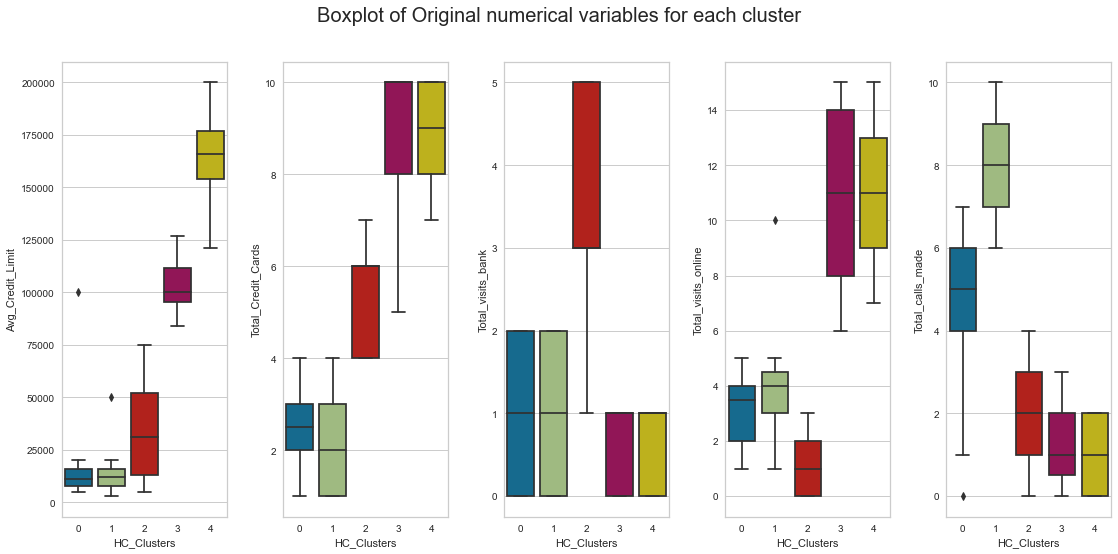

In [70]:
fig, axes = plt.subplots(1, 5, figsize=(16, 8))
fig.suptitle("Boxplot of Original numerical variables for each cluster",fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii], y=df[num_col[counter]], x=df["HC_Clusters"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

**Observations:**
- 

- Cluster 0: Callers
    - This group has the lowest Average Credit Limit ~10,000 to 17,000.
    - This group has the lowest number of Credit Cards - 2 to 3.
    - This group has a low number of visits to the bank per year - 0 to 2.
    - This group has a low number of online bank visits per year - 2 to 4.
    - This group has a high number of bank calls per year - 4 to 6.
- Cluster 1: Callers
    - This group has the lowest Average Credit Limit ~10,000 to 17,000.
    - This group has the lowest number of Credit Cards - 1 to 3.
    - This group has a low number of visits to the bank per year - 0 to 2.
    - This group has a low number of online bank visits per year - 3 to 4.
    - This group has the highest number of bank calls per year - 7 to 9.
- Cluster 2: Socializers
    - This group has a moderate Average Credit Limit ~17,000 to 50,000.
    - This group has a moderate number of Credit Cards - 4 to 6.
    - This group has the highest number of visits to the bank per year - 3 to 5.
    - This group has lowest number of online bank visits per year - 0 to 2.
    - This group has a low number of bank calls per year - 3 to 5.
- Cluster 3: Onliners
    - This group has a moderate Average Credit Limit ~95,000 to 113,000.
    - This group has the highest number of Credit Cards - 8 to 10.
    - This group has lowest number of visits to the bank per year - 0 to 1.
    - This group has a moderate to high number of online bank visits per year - 8 to 14.
    - This group has the lowest number of bank calls per year - 1 to 2.
- Cluster 4: Onliners
    - This group has the highest Average Credit Limit ~150,000 to 170,000.
    - This group has the highest number of Credit Cards - 8 to 10.
    - This group has lowest number of visits to the bank per year - 0 to 1.
    - This group has the highest number of online bank visits per year - 9 to 11.
    - This group has a low number of bank calls per year - 0 to 2.
 
 
 ### Insights and Business Recommendations

 Since Clusters 0 and 1 are similar and Clusters 3 and 4 are similar, this suggests that a total of 3 Clusters would be a better option.

- Clusters 0 & 1: Callers
     - This group has the smallest Average Credit Limit and number of credit cards. They are the least likely to visit the bank, and are more likely open to marketing by phone calls.
     - Clusters 0 & 1 should be marketed through phone calls. This group is the least likely to open new lines of Credit, so pitching new products could be the most difficult with this group. Incentives should be maximized when targeting Cluster 0 & 1.
 
- Cluster 2: Socializers
     - This group has moderate Average Credit Limits and number of credit cards, high numbers of bank visits and low number of online bank visits. These Customers prefer face-to-face banking, but not online banking. Therefore they are least likely to be reached using Online marketing.
    - Cluster 2 should be marketed through face-to-face marketing within the banks. This group may be open to new lines of Credit. Incentives should include personalized Banking that may be most appealling to Cluster 2.

- Clusters 3 & 4: Onliners
    - These groups are similar in that they have high Average Credit Limits and number of credit cards, low numbers of bank visits and higher number of online bank visits. These Customers prefer online banking and are least likely to be reached using in-bank or phone call marketing.
    - Cluster 3 and 4 should be marketed through Online advertisements. This group is most likely to open new lines of Credit, so pitching new products could be the easiest with this group.

### Hierarchical Clustering with 3 Clusters
Next, let's run the Agglomerative Clustering with number of clusters equal to 3 since there are redundant groups for number of clusters equal to 5.

In [71]:
# Create the hierarchical clusters using 3 clusters, Euclidean distance and Complete
HCmodel3 = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="complete")
HCmodel3.fit(subset_scaled_df)

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [72]:
# Add the labels to the scaled data and the original data
subset_scaled_df["HC_Clusters3"] = HCmodel3.labels_
df["HC_Clusters3"] = HCmodel3.labels_

### Cluster Profiling - Hierarchical Clustering with 3 Clusters
- Are the Clusters meaningful?
- Do the Clusters have variability?

In [73]:
cluster_profile = df.groupby("HC_Clusters3").mean()

In [74]:
cluster_profile["count_in_each_HCsegment"] = (
    df.groupby("HC_Clusters3")["Total_Credit_Cards"].count().values
)

In [75]:
# let's see the Credit Cards in each cluster
for cl in df["HC_Clusters3"].unique():
    print("In cluster {}, the Customers have the following number of credit cards:".format(cl))
    print(df[df["HC_Clusters3"] == cl]["Total_Credit_Cards"].unique())
    print()

In cluster 0, the Customers have the following number of credit cards:
[2 3 4 1]

In cluster 2, the Customers have the following number of credit cards:
[7 5 4 6]

In cluster 1, the Customers have the following number of credit cards:
[ 6  5  9  8 10  7]



There is variability among the Clusters regarding the number of Credit Cards.

In [76]:
# let's see the Total Bank Visits in each cluster
for cl in df["HC_Clusters3"].unique():
    print("In cluster {}, the Customers have the following number of Bank visits:".format(cl))
    print(df[df["HC_Clusters3"] == cl]["Total_visits_bank"].unique())
    print()

In cluster 0, the Customers have the following number of Bank visits:
[1 0 2]

In cluster 2, the Customers have the following number of Bank visits:
[1 2 5 3 4]

In cluster 1, the Customers have the following number of Bank visits:
[0 1]



There is some variability among the Clusters regarding the number of bank visits.

In [77]:
# let's see the Total Online Visits in each cluster
for cl in df["HC_Clusters3"].unique():
    print("In cluster {}, the Customers have the following number of Online visits:".format(cl))
    print(df[df["HC_Clusters3"] == cl]["Total_visits_online"].unique())
    print()

In cluster 0, the Customers have the following number of Online visits:
[ 1 10  2  5  4  3]

In cluster 2, the Customers have the following number of Online visits:
[3 1 0 2]

In cluster 1, the Customers have the following number of Online visits:
[12 11 14  7 10 13 15  6  8  9]



There is variability among the Clusters regarding the number of online bank visits.

In [78]:
# let's see the Total Calls Made in each cluster
for cl in df["HC_Clusters3"].unique():
    print("In cluster {}, the Customers have the following number of Calls made:".format(cl))
    print(df[df["HC_Clusters3"] == cl]["Total_calls_made"].unique())
    print()

In cluster 0, the Customers have the following number of Calls made:
[ 0  9  8  1  2  7  5  6  4 10]

In cluster 2, the Customers have the following number of Calls made:
[4 0 2 3 1]

In cluster 1, the Customers have the following number of Calls made:
[3 2 1 0]



There is variability among the Clusters regarding the number of calls to the bank.

In [79]:
# let's display cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0).highlight_min(color="lightblue", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K_means_segments,HC_Clusters,count_in_each_HCsegment
HC_Clusters3,,,,,,,,
0,12564.444444,2.408889,0.933333,3.542222,6.840000,0.995556,0.564444,225
1,141040.000000,8.740000,0.600000,10.900000,1.080000,2.000000,3.620000,50
2,33610.389610,5.524675,3.496104,0.981818,2.005195,0.000000,2.000000,385


Highlighting minimums and maximums for each feature by Cluster displays variability among the clusters.

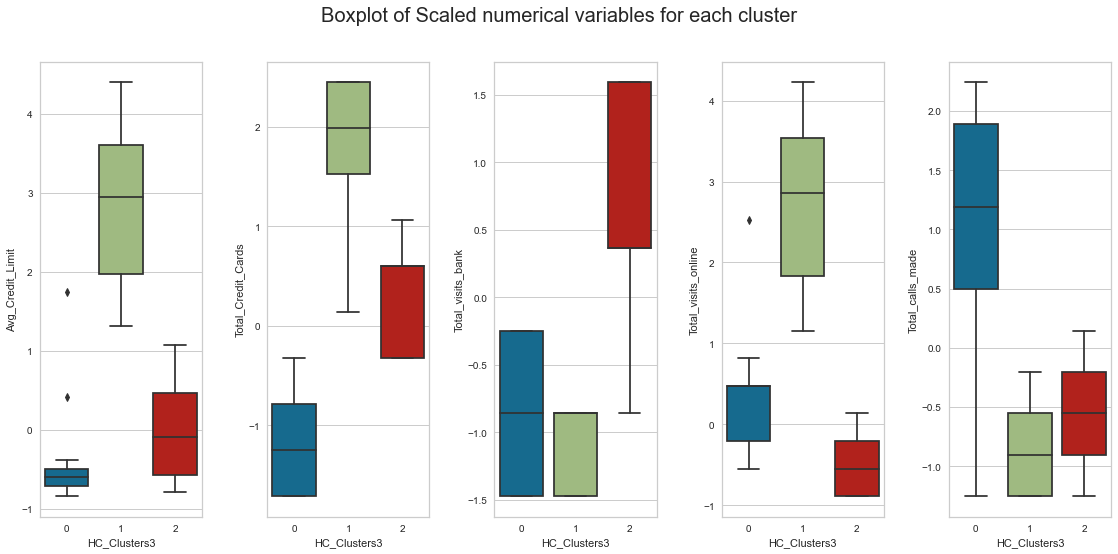

In [80]:
fig, axes = plt.subplots(1, 5, figsize=(16, 8))
fig.suptitle("Boxplot of Scaled numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii], y=subset_scaled_df[num_col[counter]], x=subset_scaled_df["HC_Clusters3"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

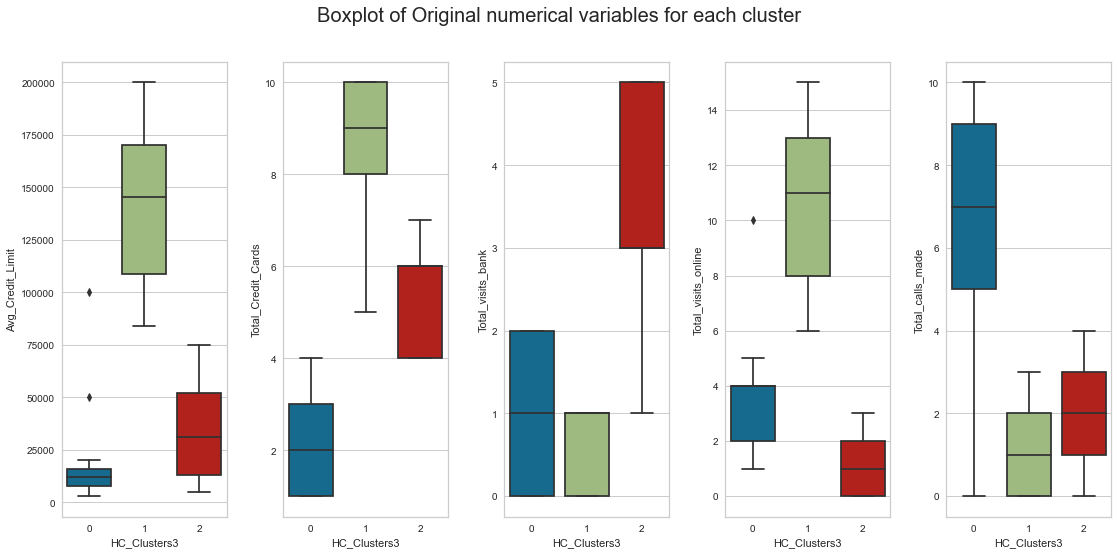

In [81]:
fig, axes = plt.subplots(1, 5, figsize=(16, 8))
fig.suptitle("Boxplot of Original numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii], y=df[num_col[counter]], x=df["HC_Clusters3"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

**Observations:**
- 

- Cluster 0: Callers
    - This group has the lowest Average Credit Limit ~10,000 to 60,000.
    - This group has lowest number of Credit Cards - 1 to 3.
    - This group has a low number of visits to the bank per year - 0 to 2.
    - This group has a low number of online bank visits per year - 2 to 4.
    - This group has the highest number of bank calls per year - 5 to 9.
- Cluster 1: Onliners
    - This group has the highest Average Credit Limit ~115,000 to 165,000.
    - This group has the highest number of Credit Cards - 8 to 10.
    - This group has lowest number of visits to the bank per year - 0 to 1.
    - This group has highest number of online bank visits per year - 8 to 13.
    - This group has the lowest number of bank calls per year - 0 to 2.
- Cluster 2: Socializers
    - This group has a moderate Average Credit Limit ~10,000 to 51,000.
    - This group has a moderate number of Credit Cards - 4 to 6.   
    - This group has the highest number of visits to the bank per year - 3 to 5.
    - This group has lowest number of online bank visits per year - 0 to 2.
    - This group has a low number of bank calls per year - 1 to 3.

 
 
 ### Insights and Business Recommendations

- Cluster 0: Callers
     - This group has the smallest Average Credit Limit and number of credit cards. They are the least likely to visit the bank, and are more likely open to marketing by phone calls.
     - Cluster 0 should be marketed through phone calls. This group is the least likely to open new lines of Credit, so pitching new products could be the most difficult with this group. Incentives should be maximized when targeting Cluster 0. 

- Clusters 1: Onliners
    - This group has high Average Credit Limits and number of credit cards, low numbers of bank visits and higher number of online bank visits. This group has 0 to 2 calls with the bank per year. These Customers prefer online banking and are least likely to be reached using in-bank or phone call marketing.
    - Cluster 1 should be marketed through Online advertisements. This group is most likely to open new lines of Credit, so pitching new products could be the easiest with this group.
    
- Clusters 2: Socializers
     - This group has moderate Average Credit Limits and number of credit cards, high numbers of bank visits and low number of online bank visits. It also has 1 to 3 calls with the bank per year. These Customers prefer face-to-face banking and are least likely to be reached using Online marketing.
    - Cluster 2 should be marketed through face-to-face marketing within the banks. This group may be open to new lines of Credit. Incentives should include personalized Banking that may be most appealling to Cluster 2.

In [82]:
df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K_means_segments,HC_Clusters,HC_Clusters3
0,100000,2,1,1,0,0,0,0
1,50000,3,0,10,9,1,1,0
2,50000,7,1,3,4,0,2,2
3,30000,5,1,1,4,0,2,2
4,100000,6,0,12,3,2,3,1


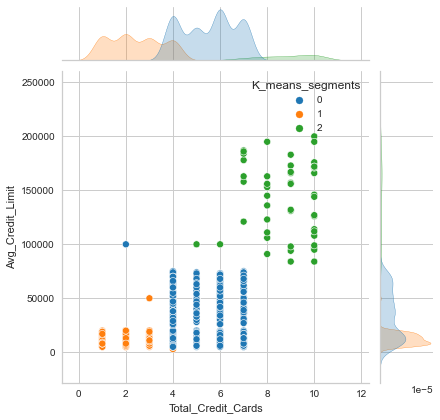

In [83]:
# Plot the clusters for K means
sns.jointplot(y=df.Avg_Credit_Limit, x=df.Total_Credit_Cards,
              hue=df['K_means_segments'], palette='tab10')

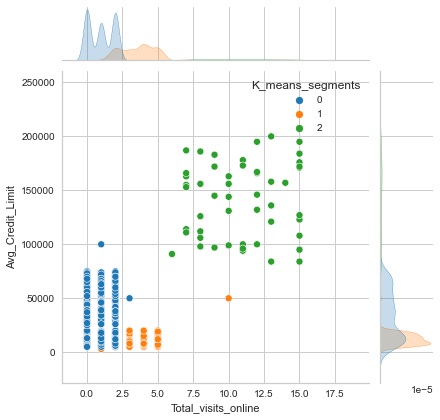

In [84]:
# Plot the clusters for K means
sns.jointplot(y=df.Avg_Credit_Limit, x=df.Total_visits_online,
              hue=df['K_means_segments'], palette='tab10')

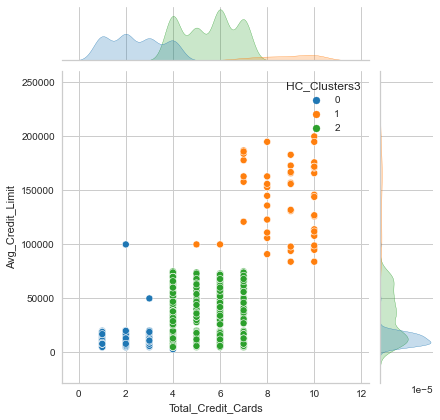

In [85]:
# Plot the clusters for Hierarchical Agglomerative
sns.jointplot(y=df.Avg_Credit_Limit, x=df.Total_Credit_Cards,
              hue=df['HC_Clusters3'], palette='tab10')

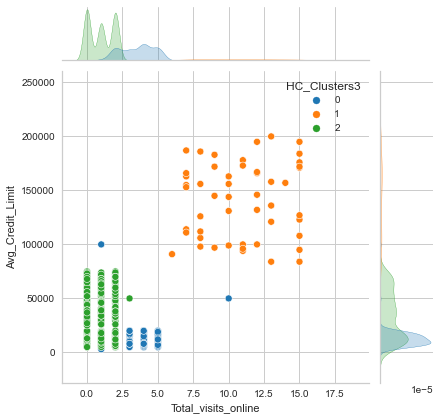

In [86]:
# Plot the clusters for Hierarchical Agglomerative
sns.jointplot(y=df.Avg_Credit_Limit, x=df.Total_visits_online,
              hue=df['HC_Clusters3'], palette='tab10')

## Conclusions and Recommendations

### Conclusions

- Based on K means clustering and Hierarchical agglomerative clustering, 3 appears to be the appropriate number of clusters for Customer segmentation.
- Comparing observations and insights for the 3 K means clusters and the 3 Hierarchical clusters, segmentation results are consistent.

- Cluster: Callers
     - This group has the smallest Average Credit Limit and number of credit cards. They are the least likely to visit the bank, and are more likely open to marketing by phone calls.

- Cluster: Onliners
    - This group has high Average Credit Limits and number of credit cards, low numbers of bank visits and higher number of online bank visits. These Customers prefer online banking and are least likely to be reached using in-bank or phone call marketing.
    
- Cluster: Socializers
     - This group has moderate Average Credit Limits and number of credit cards, high numbers of bank visits and low number of online bank visits. These Customers prefer face-to-face banking and are least likely to be reached using Online marketing.

### Recommendations and Insights

- It is not clear from the data provided which Customers view Support Services poorly. It would be useful to analyze the Customer's Services rating to understand which area or areas need improvement.
- Since there are three pathways for Customers to communicate with AllLife Bank, the company may be required to upgrade Customer service delivery in all three areas.

- Cluster Marketing: Callers
     - Customers should be marketed through phone calls. This group is the least likely to open new lines of Credit, so pitching new products could be the most difficult with this group. Incentives should be maximized when targeting this group. 

- Clusters Marketing: Onliners
    - Customers should be marketed through Online advertisements. This group is most likely to open new lines of Credit, so pitching new products could be the easiest with this group. Incentives should include a more streamlined online service.
    
- Cluster Marketing: Socializers
    - Customers should be marketed through face-to-face marketing within the banks. This group may be open to new lines of Credit. Incentives should include personalized Banking that may be most appealling to this group. 
    